In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
temp1 = pd.read_csv('../Output/Task2_step4.csv')
temp1.head()

,participant_ID,treatment,part,trial_no,setup_cost_red,setup_cost_blue,red_prior_prob,current_rounds,action_type,suspect,count_red_samples,count_blue_samples,evidence_found,evidence_suspect,posterior,true_guilty_suspect,suspect_accused,time
0,1.0,1.0,2.0,1.0,10.0,10.0,0.7,1,0,1.0,0,0,0,-1.0,0.700000,1.0,0.0,6016.7120
1,1.0,1.0,2.0,1.0,10.0,10.0,0.7,2,0,1.0,0,1,0,-1.0,0.756757,1.0,0.0,6733.3740
2,1.0,1.0,2.0,1.0,10.0,10.0,0.7,3,0,1.0,0,2,0,-1.0,0.805755,1.0,0.0,7383.4022
3,1.0,1.0,2.0,1.0,10.0,10.0,0.7,4,0,1.0,0,3,0,-1.0,0.846881,1.0,0.0,8000.0214
4,1.0,1.0,2.0,1.0,10.0,10.0,0.7,5,0,1.0,0,4,0,-1.0,0.880590,1.0,0.0,8716.7231


In [3]:
fin = []
for key,value in temp1.iterrows():
    if value[8] == 1.0:
        fin.append(temp1['posterior'][key])

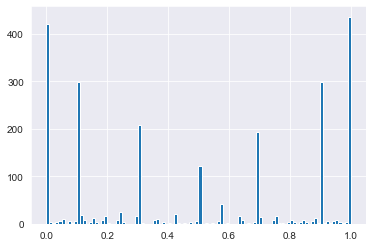

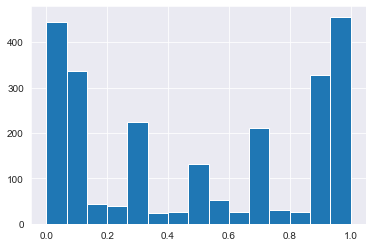

In [4]:
plt.hist(fin, bins=100)
plt.show()
plt.hist(fin, bins=15)
plt.show()

In [13]:
def c_statistic(file):
    temp1 = pd.read_csv(file)
    t2_accuse = temp1.loc[temp1['action_type'] == 1]
    t2_investigate = temp1.loc[temp1['action_type'] == 0]
    t2_accuse_clean = t2_accuse.loc[t2_accuse['evidence_found'] == 0]
    t2_investigate_clean = t2_investigate.loc[t2_investigate['evidence_found'] == 0]
    t2_accuse_certain = t2_accuse.loc[t2_accuse['evidence_found'] == 1]
    distr_stop_time = t2_accuse['current_rounds'].to_list()
    distr_stop_time2 = [i for i in distr_stop_time if i > 1]
    distr_stop_belief = t2_accuse['posterior'].to_list()
    t2_accuse_correct = t2_accuse.iloc[:,15]==t2_accuse.iloc[:,16]
    t2_perc_correct = np.mean(t2_accuse_correct)

    # percentage evidence found
    t2_perc_evidence_found = np.mean(t2_accuse.iloc[:,12])
    t2_perc_evidence_found=t2_perc_evidence_found*1.6

    select_rounds = t2_investigate
    select_rounds = select_rounds.loc[select_rounds.iloc[:,7]==1,:]
    select_rounds_low = select_rounds.loc[select_rounds.iloc[:,6]<0.5,:]
    avg_rounds_low = np.mean(select_rounds_low.iloc[:,9])
    select_rounds_high = select_rounds.loc[select_rounds.iloc[:,6]>0.5,:]
    avg_rounds_high = 1-np.mean(select_rounds_high.iloc[:,9])
    t2_perc_confirmatory_round1 = np.mean([avg_rounds_low, avg_rounds_high])
    #t2_perc_confirmatory_round1 = t2_perc_confirmatory_round1*1.2

    # all rounds
    select_rounds = t2_investigate_clean
    select_rounds_low = select_rounds.loc[select_rounds.iloc[:,14]<0.5,:]
    avg_rounds_low = np.mean(select_rounds_low.iloc[:,9])
    select_rounds_high = select_rounds.loc[select_rounds.iloc[:,14]>0.5,:]
    avg_rounds_high = 1-np.mean(select_rounds_high.iloc[:,9])
    t2_perc_confirmatory_allrounds = np.mean([avg_rounds_low, avg_rounds_high])
    #t2_perc_confirmatory_allrounds = t2_perc_confirmatory_allrounds*1.2


    # number of samples
    t2_totsamples = t2_accuse.iloc[:,10]+t2_accuse.iloc[:,11]
    t2_avg_samples = np.mean(t2_totsamples)
    t2_avg_samples = t2_avg_samples*1.6

    # score
    t2_unitcost = t2_accuse.iloc[:,4]
    t2_round_score = t2_accuse_correct*1000+500-t2_unitcost*t2_totsamples
    t2_avg_score = np.mean(t2_round_score)
    t2_avg_score = t2_avg_score*0.90
    return t2_avg_score,t2_avg_samples,t2_perc_confirmatory_allrounds,t2_perc_confirmatory_round1

In [14]:
name = ['../Output/Task2_step4.csv','../Output (Simulated)/Step4_A.csv',
        '../Output (Simulated)/Step4_B.csv','../Output (Simulated)/Step4_C.csv']
for i in name:
    t2_avg_score,t2_avg_samples,t2_perc_confirmatory_allrounds,t2_perc_confirmatory_round1 = c_statistic(i)
    print(i)
    print('t2_avg_score:',t2_avg_score)
    print('t2_avg_samples:',t2_avg_samples)
    print('t2_perc_confirmatory_allrounds:',t2_perc_confirmatory_allrounds)
    print('t2_perc_confirmatory_round1:',t2_perc_confirmatory_round1)

../Output/Task2_step4.csv
t2_avg_score: 1163.686875
t2_avg_samples: 4.731333333333334
t2_perc_confirmatory_allrounds: 0.5541236554243263
t2_perc_confirmatory_round1: 0.7781613791877722
../Output (Simulated)/Step4_A.csv
t2_avg_score: 867.5730000000001
t2_avg_samples: 5.7504
t2_perc_confirmatory_allrounds: 0.5179015754460756
t2_perc_confirmatory_round1: 0.5662532299741603
../Output (Simulated)/Step4_B.csv
t2_avg_score: 868.3065
t2_avg_samples: 5.5456
t2_perc_confirmatory_allrounds: 0.48346754002463904
t2_perc_confirmatory_round1: 0.4989086868526529
../Output (Simulated)/Step4_C.csv
t2_avg_score: 847.3365
t2_avg_samples: 7.1664
t2_perc_confirmatory_allrounds: 0.47229245135819675
t2_perc_confirmatory_round1: 0.48589739781368824


t2_avg_score: 1163.686875
t2_avg_samples: 4.731333333333334
t2_perc_confirmatory_allrounds: 0.5541236554243263
